# Introducing the Discrete Fourier Transform (DFT)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### The Collocation Problem with Trigonometric Basis Functions

###### The form of the trigonometric polynomial that we will study in this course is defined
$$\sum_{k=-\frac{N_k}{2}+1}^{\frac{N_k}2} a_k\cos(kx) + b_k\sin(kx) = f(x)$$

$N_k$ is the number of frequencies and $j$ can range up to the number of grid-points for $x$.

###### We could determine the coefficients $a_k$ and $b_k$ by collocation (the direct method) and invert a matrix.

$$\sum_{k=-\frac{N_k}{2}+1}^{\frac{N_k}2} a_k\cos(kx_j) + b_k\sin(kx_j) = f_j$$

###### <font color=red>But we do not need to set up a system of equations. We can use orthogonality of $\sin(kx)$ and $\cos(kx)$ over $x\in[-\pi,\pi]$ to compute the coefficients using quadrature. In fact, we will use the trapezoidal rule!

###### You proved that

$$\frac1{\pi}\int_{-\pi}^\pi\cos\left(mx\right)\cos\left(nx\right)\,dx = \delta_{mn}$$

$$\frac1{\pi}\int_{-\pi}^\pi\sin\left(mx\right)\sin\left(nx\right)\,dx = \delta_{mn}$$

$$\frac1{\pi}\int_{-\pi}^\pi\cos\left(mx\right)\sin\left(nx\right)\,dx = 0$$
for $m,n\in\mathbb{Z}$.

###### So we can determine $a_n$ by using orthogonality as follows:

$$\sum_{k=-\frac{N_k}{2}+1}^{\frac{N_k}2} a_k\cos(kx) + b_k\sin(kx) = f(x)$$

$$\sum_{k=-\frac{N_k}{2}+1}^{\frac{N_k}2} a_k\left(\cos(kx),\cos(nx)\right) + b_k\left(\sin(kx),\cos(nx)\right) = \left(f(x),\cos(nx)\right)$$

$$\sum_{k=-\frac{N_k}{2}+1}^{\frac{N_k}2} a_k\delta_{kn} + b_k0 = \left(f(x),\cos(nx)\right)$$

$$a_n = \left(f(x),\cos(nx)\right)$$

Recall that if $f$ is an odd function, then $$a_n = \left(f(x),\cos(nx)\right)=0$$ since cosine is an even function.

###### We can determine $b_n$ by using orthogonality as follows:

$$\sum_{k=-\frac{N_k}{2}+1}^{\frac{N_k}2} a_k\cos(kx) + b_k\sin(kx) = f(x)$$

$$\sum_{k=-\frac{N_k}{2}+1}^{\frac{N_k}2} a_k\left(\cos(kx),\sin(nx)\right) + b_k\left(\sin(kx),\sin(nx)\right) = \left(f(x),\sin(nx)\right)$$

$$\sum_{k=-\frac{N_k}{2}+1}^{\frac{N_k}2} a_k0 + b_k\delta{kn} = \left(f(x),\sin(nx)\right)$$

$$b_n = \left(f(x),\sin(nx)\right)$$

Recall that if $f$ is an even function, then $$b_n = \left(f(x),\sin(nx)\right)=0$$ since sine is an odd function.

### Fourier Coefficients and the Fourier Cosine Transform and Fourier Sine Transform

###### We will define the Fourier Cosine Coefficient as $$a_k = (f,\cos(kx)) = \frac1{\pi}\int_{-\pi}^\pi f(x)\cos(kx)\,dx$$

###### We will define the Fourier Sine Coefficient as $$b_k = (f,\sin(kx)) = \frac1{\pi}\int_{-\pi}^\pi f(x)\sin(kx)\,dx$$

###### But our data will be discrete, so we need to approximate these coefficients using a quadrature rule. We will use the trapezoidal rule and this discretization results in the so-called Discrete Fourier Transform.

### Discrete Fourier Transform (DFT)

###### In order to compute the DFT over a frequency grid you will need to write an algorithm that
* executes the trapezoidal rule
* over a grid for $x$
* at each frequency $k$

<font color=red>That means that you will implement the trapezoidal rule using a matrix (vectorization).

###### To get a feel for this kind of computation, we can compute the following integrals using the trapezoidal rule with $n = 8$ grid points.

###### $f(x)=1x$ $$a_0 = \int_0^1\,1\,x\,dx \approx \sum_{j=0}^71\,x_j\,\,w_j$$

###### $$\begin{pmatrix}
1x_0 & 1x_1 & 1x_2 & \ldots & 1x_7
\end{pmatrix}\begin{pmatrix}
w_0 \\
w_1 \\
w_2 \\
\vdots \\
w_7 \\
\end{pmatrix}
=
a_0$$
where $w_0 = \frac12h$, $w_1 = 1h$, $w_2 = 1h$,$\ldots$, $w_7=\frac12h$ where $h=\frac17$ and the computed coefficient is $a_0 = \frac12$

In [2]:
N = 8
k = 1
x = np.linspace(0,1,N)
h = (x[-1]-x[0])/(N-1)
w = np.ones(N)
w[0], w[-1] = 0.5, 0.5
w = h*w
f = k*x
print('a0 = {}'.format(f.dot(w)))

a0 = 0.49999999999999994


###### $f(x)=2x$ $$a_1=\int_0^1\,2\,x\,dx \approx \sum_{j=0}^72\,x_j\,w_j$$

###### $$\begin{pmatrix}
2x_0 & 2x_1 & 2x_2 & \ldots & 2x_7
\end{pmatrix}\begin{pmatrix}
w_0 \\
w_1 \\
w_2 \\
\vdots \\
w_7 \\
\end{pmatrix}
=
a_1$$
where $w_0 = \frac12h$, $w_1 = 1h$, $w_2 = 1h$,$\ldots$, $w_7=\frac12h$ where $h=\frac17$ and the computed coefficient is $a_1 = 1$

In [3]:
N = 8
k = 2
x = np.linspace(0,1,N)
h = (x[-1]-x[0])/(N-1)
w = np.ones(N)
w[0], w[-1] = 0.5, 0.5
w = h*w
f = k*x
print('a1 = {}'.format(f.dot(w)))

a1 = 0.9999999999999999


###### $f(x)=3x$ $$a_2=\int_0^1\,3\,x\,dx \approx \sum_{j=0}^73\,x_j\,w_j$$

###### $$\begin{pmatrix}
3x_0 & 3x_1 & 3x_2 & \ldots & 3x_7
\end{pmatrix}\begin{pmatrix}
w_0 \\
w_1 \\
w_2 \\
\vdots \\
w_7 \\
\end{pmatrix}
=
a_2$$
where $w_0 = \frac12h$, $w_1 = 1h$, $w_2 = 1h$,$\ldots$, $w_7=\frac12h$ where $h=\frac17$ and the computed coefficient is $a_2 = \frac32$

In [4]:
N = 8
k = 3
x = np.linspace(0,1,N)
h = (x[-1]-x[0])/(N-1)
w = np.ones(N)
w[0], w[-1] = 0.5, 0.5
w = h*w
f = k*x
print('a2 = {}'.format(f.dot(w)))

a2 = 1.4999999999999998


###### Now combine these three separate computations into one matrix-vector multiply.

###### $$\begin{pmatrix}
1x_0 & 1x_1 & 1x_2 & \ldots & 1x_7\\
2x_0 & 2x_1 & 2x_2 & \ldots & 2x_7\\
3x_0 & 3x_1 & 3x_2 & \ldots & 3x_7
\end{pmatrix}\begin{pmatrix}
w_0 \\ w_1 \\ w_2 \\ \ldots \\ w_7
\end{pmatrix}
=
\begin{pmatrix}
a_0 \\ a_1 \\ a_2
\end{pmatrix}$$
where $w_0 = \frac12h$, $w_1 = 1h$, $w_2 = 1h$,$\ldots$, $w_7=\frac12h$ where $h=\frac17$ and the computed coefficients are $a_0 = \frac12$, $a_1 = 1$, $a_2 = \frac32$.

In [5]:
# Outer product to create the matrix
N = 8
k = np.arange(1,4)
np.outer(k,np.ones(N))

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3., 3., 3., 3.]])

In [6]:
N = 8
x = np.linspace(0,1,N)
h = (x[-1]-x[0])/(N-1)
k = np.arange(1,4)
w = np.ones(N)
w[0], w[-1] = 1/2, 1/2
w = w*h
f = np.outer(k,x)
a = f.dot(w)
#print(x*1)
#print(x*k)
print('a = {}'.format(a))

a = [0.5 1.  1.5]


### Discrete Cosine Transform (DCT)

###### What is the algorithm for the Fourier cosine coefficient $\displaystyle a_k = \frac1{\pi}\int_{-\pi}^\pi f(x)\cos(kx)\,dx$?

###### Notice that
* $h =\frac1{N-1}$ will be factored into the trapezoidal rule
* The frequency range will be centered at $k=0$ so $k$ will range over $\left[-\frac{N_k}2+1,\ldots,\frac{N_k}2\right]$ 
* The weights for the trapezoidal rule are $\vec{w} = [\frac12, 1, 1, \ldots, 1, \frac12]$ but the assumption of periodicity means that we assume that the first and final endpoints yield the same result, so we are adding them together in the sum yielding $\vec{w} = [1, 1, 1, \ldots, 1]$
* Computationally we can ignore the weight vector and simply compute the dot product of $f(x)$ and the cosine kernel.

###### $$a_k = \frac1{N-1}\sum_{k=-\frac{N_k}{2}+1}^{\frac{N_k}2}f_j\cos(kx_j)=\frac{\cos\left(\vec{k}\otimes \vec{x}\right)\,\vec{f}}{N-1}$$ where $j=1,2,\ldots,N-2$ since the function values at the nodes where $j=0$ and $j=N-1=n$ are added together.

###### Let $N_k = 8$ (frequency grid) and $N = 20$ (x grid) to start.

In [7]:
Nk = 8
N = 20
L = np.pi
# Spatial grid
x = np.linspace(-L,L,N)
x = x[:-1] # Evaluations at first and last endpoint are added together due to periodicity
# k = -Nk/2+1 ... Nk/2
# Frequency grid
k = np.arange(-Nk/2+1,Nk/2+1) # Recall arange leaves out last value
f = 1/np.cosh(x)
C = np.cos(np.outer(k,x))
a = C.dot(f)/(N-1)
#print(a)

In [8]:
k

array([-3., -2., -1.,  0.,  1.,  2.,  3.,  4.])

###### Fit the even function $f(x) = \frac1{\cosh(x)}$

######  $b_k=0~\forall k$ so the trigonometric interpolant (Fourier series) is (Cosine series) $$f_j= \sum_k a_k\cos(kx_j) \leftrightarrow \cos\left(\vec{x}\otimes\vec{k}\right)\vec{a}$$ where $k = -\frac{N_k}2+1,\ldots,\frac{N_k}2$ and the nodes are $x_j$.

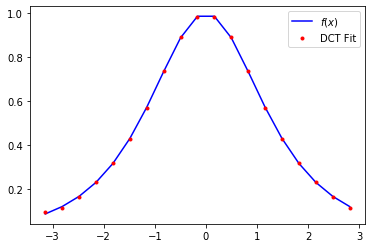

In [9]:
Fc = a.dot(C)
plt.plot(x,f,'b',x,Fc,'r.')
plt.legend(['$f(x)$','DCT Fit']);

### Discrete Sine Transform (DST)

###### What is the algorithm for the Fourier sine coefficient $\displaystyle b_k = \frac1{\pi}\int_{-\pi}^{\pi} f(x)\sin(kx)\,dx$?

###### $$b_k = \frac1{N-1}\sum_{k=-\frac{N_k}{2}+1}^{\frac{N_k}2}f_j\sin(kx_j)=\frac{\sin\left(\vec{k}\otimes \vec{x}\right)\,\vec{f}}{N-1}$$ where $j=1,2,\ldots,N-2$ since the function values at the nodes where $j=0$ and $j=N-1=n$ are added together.

In [10]:
Nk = 8
N = 20
L = np.pi
# Spatial grid
x = np.linspace(-L,L,N)
x = x[:-1] # Evaluations at first and last endpoint are added together due to periodicity
# k = -Nk/2+1 ... Nk/2
# Frequency grid
k = np.arange(-Nk/2+1,Nk/2+1) # Recall arange leaves out last value
f = np.tanh(2*x)
S = np.sin(np.outer(k,x))
b = S.dot(f)/(N-1)
#print(b)

###### Fit the odd function $f(x) = \tanh(2x)$

######  $a_k=0~\forall k$ so the trigonometric interpolant (Fourier series) is (Sine series) $$f_j = \sum_k a_k\sin(kx_j) \leftrightarrow \sin\left(\vec{x}\otimes\vec{k}\right)\vec{a}$$ where $k = -\frac{N_k}2+1,\ldots,\frac{N_k}2$ and the nodes are $x_j$.

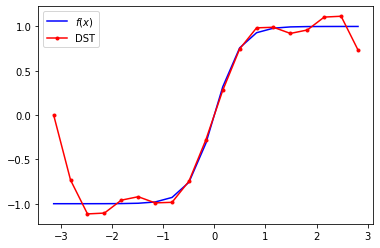

In [11]:
Fs = b.dot(S)
plt.plot(x,f,'b',x,Fs,'r.-')
plt.legend(['$f(x)$','DST']);

-[back-to-top](#Introducing-the-Discrete-Fourier-Transform-(DFT))